## Historical Stock volatiliy

* Download Google stock price data from the Web
* Calculate the rolling standard deviation of the log returns (volatility)
* Plot the stock price data and the results

In [2]:
import numpy as np
import pandas as pd
import pandas.io.data as web
%matplotlib inline

In [26]:
goog = web.DataReader('GOOG', data_source='google', start='3/14/2009', end='4/14/2014')

In [34]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')

In [35]:
goog.tail()

,Open,High,Low,Close,Volume
﻿Date,,,,,
2014-04-08,542.60,555.00,541.61,554.90,3152406
2014-04-09,559.62,565.37,552.95,564.14,3324742
2014-04-10,565.00,565.00,539.90,540.95,4027743
2014-04-11,532.55,540.00,526.53,530.60,3916171
2014-04-14,538.25,544.10,529.56,532.52,2568020


In [5]:
goog['Log_Ret'] = np.log(goog['Close'] / goog['Close'].shift(1))

In [36]:
goog.tail()

,Open,High,Low,Close,Volume
﻿Date,,,,,
2014-04-08,542.60,555.00,541.61,554.90,3152406
2014-04-09,559.62,565.37,552.95,564.14,3324742
2014-04-10,565.00,565.00,539.90,540.95,4027743
2014-04-11,532.55,540.00,526.53,530.60,3916171
2014-04-14,538.25,544.10,529.56,532.52,2568020


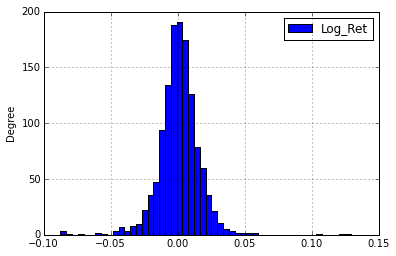

In [7]:
goog[['Log_Ret']].plot(kind='hist', bins=50)

In [8]:
goog['Ret'] = (goog['Close'] / goog['Close'].shift(1)) - 1

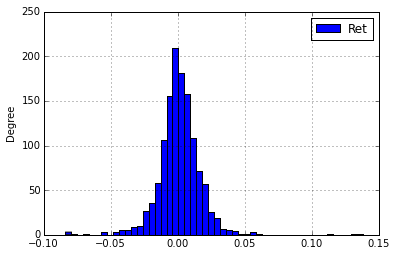

In [9]:
goog[['Ret']].plot(kind='hist', bins=50)

In [37]:
goog.tail()

,Open,High,Low,Close,Volume
﻿Date,,,,,
2014-04-08,542.60,555.00,541.61,554.90,3152406
2014-04-09,559.62,565.37,552.95,564.14,3324742
2014-04-10,565.00,565.00,539.90,540.95,4027743
2014-04-11,532.55,540.00,526.53,530.60,3916171
2014-04-14,538.25,544.10,529.56,532.52,2568020


In [11]:
np.mean(goog['Log_Ret'])

0.00094239907645613419

In [12]:
np.mean(goog['Ret'])

0.0010685524214626603

In [13]:
goog['Vola'] = pd.rolling_std(goog['Ret'], window=252) * np.sqrt(252)

In [16]:
np.std(goog['Ret'])

0.015908157523352357

In [17]:
avg = np.mean(goog['Ret'])

In [18]:
vola = np.std(goog['Ret'])

In [19]:
sharpe = np.sqrt(250)*avg/vola

In [20]:
print sharpe

1.06205242378


In [21]:
avg

0.0010685524214626603

In [22]:
vola

0.015908157523352357

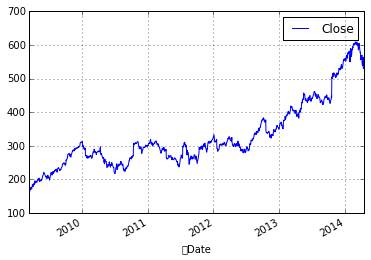

In [23]:
goog[['Close']].plot()